<a href="https://colab.research.google.com/github/map72ru/biz_learn/blob/main/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Домашнее задание
1. взять любой набор данных для бинарной классификации (можно скачать один из модельных с https://archive.ics.uci.edu/ml/datasets.php)
2. сделать feature engineering
3. обучить любой классификатор (какой вам нравится)
4. далее разделить ваш набор данных на два множества: P (positives) и U (unlabeled). Причем брать нужно не все положительные (класс 1) примеры, а только лишь часть
5. применить random negative sampling для построения классификатора в новых условиях
6. сравнить качество с решением из пункта 4 (построить отчет - таблицу метрик)
7. поэкспериментировать с долей P на шаге 5 (как будет меняться качество модели при уменьшении/увеличении размера P)

In [1]:
from google.colab import drive
drive.mount('/content/hw2')

Mounted at /content/hw2


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("hw2/MyDrive/data/adult.data", header=None, names=['age','workclass', 'fnlwgt', 'education', 'education-num','marital-status','occupation', 'relationship', 'race', 'sex',
                                                                      'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'adult'])
print(df.shape)
df.head(3)

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,adult
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  adult           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [13]:
for attr in df.columns:
  if df[attr].dtype == 'object':
    print(attr,': ',df[attr].unique())

workclass :  [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
education :  [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
marital-status :  [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation :  [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
relationship :  [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race :  [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex :  [' Male' ' Female']
native-country :  [' United-States' ' Cub

In [16]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Состав датасета:
*   age - возраст
*   workclass - класс работающего
*   fnlwgt - вес, присвоенный Бюро переписи населения
*   education - образование
*   education-num - код образования
*   marital-status - семейное положение
*   occupation - род занятий
*   relationship - отношения в семье
*   race - раса
*   sex - пол
*   capital-gain - прирост капитала
* 	capital-loss - поткря капитала
*   hours-per-week - работает часов в неделю	
*   native-country - страна рождения
*  	adult - доход (Б=50К, >50К)


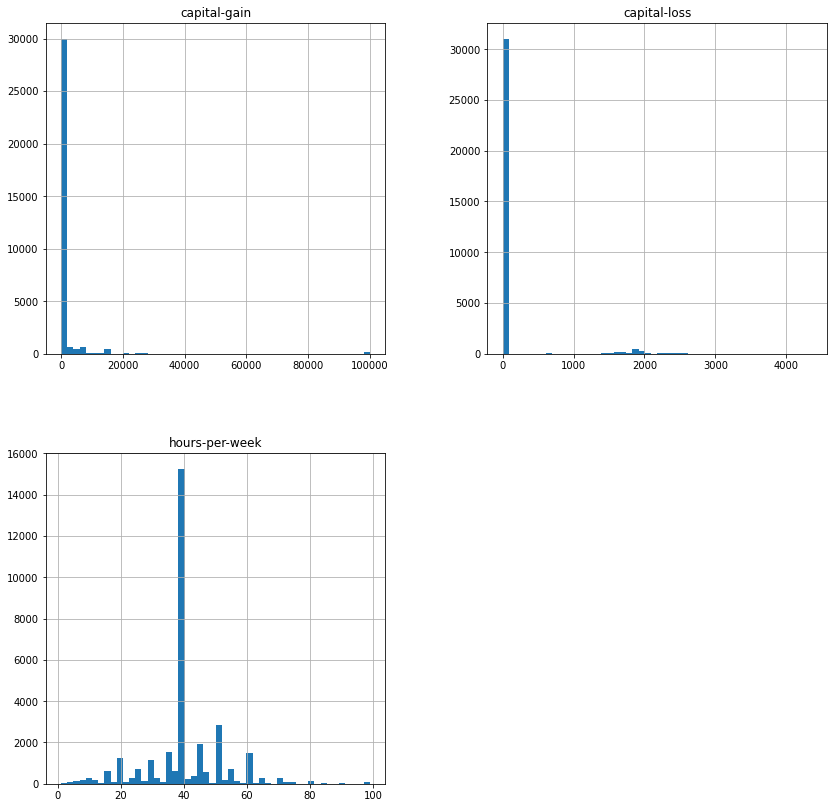

In [17]:
num_names = ['capital-gain','capital-loss','hours-per-week']
df[num_names].hist(figsize=(14,14), bins=50, grid=True);

Явных ошибок в данных нет, по крайней мере, с точки возможности существования.

Заменим категориальные переменные

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  adult           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [51]:
data = df.drop('education', axis=1)
data['target'] = data.adult.map({' <=50K': 0, ' >50K': 1})
data = data.drop('adult', axis=1)
data['sex'] = data.sex.map({' Male': 1, ' Female': 0})
data['race'] = data.race.map({' White': 1, ' Black': 0, ' Asian-Pac-Islander': 2, ' Amer-Indian-Eskimo': 3, ' Other': 4})
data['workclass'] = data.workclass.factorize()[0]
data['marital-status'] = data['marital-status'].factorize()[0]
data['relationship'] = data.relationship.factorize()[0]
data['native-country'] = data['native-country'].factorize()[0]
data['occupation'] = data['occupation'].factorize()[0]


In [52]:
data.head(10)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,0,77516,13,0,0,0,1,1,2174,0,40,0,0
1,50,1,83311,13,1,1,1,1,1,0,0,13,0,0
2,38,2,215646,9,2,2,0,1,1,0,0,40,0,0
3,53,2,234721,7,1,2,1,0,1,0,0,40,0,0
4,28,2,338409,13,1,3,2,0,0,0,0,40,1,0
5,37,2,284582,14,1,1,2,1,0,0,0,40,0,0
6,49,2,160187,5,3,4,0,0,0,0,0,16,2,0
7,52,1,209642,9,1,1,1,1,1,0,0,45,0,1
8,31,2,45781,14,0,3,0,1,0,14084,0,50,0,1
9,42,2,159449,13,1,1,1,1,1,5178,0,40,0,1


In [53]:
from sklearn.model_selection import train_test_split
X = data[num_names]
y = data['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [55]:
!pip install catboost

     |████████████████████████████████| 67.4 MB 27 kB/s 


In [56]:
from catboost import CatBoostClassifier
catClassif = CatBoostClassifier(iterations=20, thread_count=2, random_state=42, silent=True)
catClassif.fit(X_train, y_train)

In [57]:
y_pred = catClassif.predict(X_test)

In [63]:
from sklearn.metrics import f1_score, roc_auc_score, precision_score, classification_report, \
precision_recall_curve, confusion_matrix, recall_score, accuracy_score


In [64]:
result = {}
r =  roc_auc_score(y_test, catClassif.predict_proba(X_test)[:, 1])

result['classif'] = {'roc_auc': r, 'Accuracy': accuracy_score(y_test, y_pred),
                    'Precision': precision_score(y_test, y_pred), "Recall": recall_score(y_test, y_pred),
                    'matrix': confusion_matrix(y_test, y_pred)}

In [65]:
print(result['classif'])

{'roc_auc': 0.7756232515793305, 'Accuracy': 0.8295049748188184, 'Precision': 0.9298245614035088, 'Recall': 0.30254281266216915, 'matrix': array([[6170,   44],
       [1344,  583]])}


In [74]:
def make_data(ds, p):
#get the indices of the positives samples
  pos_ind = np.where(ds.iloc[:,-1].values == 1)[0]
#shuffle them
  np.random.shuffle(pos_ind)
# leave just 25% of the positives marked
  pos_sample_len = int(np.ceil(p * len(pos_ind)))
  print(f'Using {pos_sample_len}/{len(pos_ind)} as positives and unlabeling the rest')
  pos_sample = pos_ind[:pos_sample_len]
  mod_data = ds.copy()
  mod_data['class_test'] = -1
  mod_data.loc[pos_sample,'class_test'] = 1
  print('target variable:\n', mod_data.iloc[:,-1].value_counts())

  x_data = mod_data.iloc[:,:-2].values # just the X 
  y_labeled = mod_data.iloc[:,-1].values # new class (just the P & U)
  y_positive = mod_data.iloc[:,-2].values # original class

  mod_data = mod_data.sample(frac=1)
  neg_sample = new_data[mod_data['class_test']==-1][:len(mod_data[mod_data['class_test']==1])]
  pos_sample = new_data[mod_data['class_test']==1]
  print(neg_sample.shape, pos_sample.shape)
  sample_train = pd.concat([neg_sample, pos_sample]).sample(frac=1)

  catClassif = CatBoostClassifier(iterations=20, thread_count=2, random_state=42, silent=True)
  X_train = sample_train.iloc[:,:-2].values
  y_train = sample_train.iloc[:,-2].values
  catClassif.fit(X_train, y_train )
  X_test = sample_test.iloc[:,:-2].values
  y_test = sample_test.iloc[:,-2].values
  y_pred = catClassif.predict(X_test)

  r =  roc_auc_score(y_test, catClassif.predict_proba(X_test)[:, 1])

  return {'roc_auc': r, 'Accuracy': accuracy_score(y_test, y_pred),
          'Precision': precision_score(y_test, y_pred), "Recall": recall_score(y_test, y_pred),
          'matrix': confusion_matrix(y_test, y_pred)}


In [76]:
result['p25'] = make_data(data, 0.25)
result['p35'] = make_data(data, 0.35)
result['p45'] = make_data(data, 0.45)
result['p50'] = make_data(data, 0.50)

Using 1961/7841 as positives and unlabeling the rest
target variable:
 -1    30600
 1     1961
Name: class_test, dtype: int64
(1961, 15) (1961, 15)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Using 2745/7841 as positives and unlabeling the rest
target variable:
 -1    29816
 1     2745
Name: class_test, dtype: int64
(2745, 15) (2745, 15)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Using 3529/7841 as positives and unlabeling the rest
target variable:
 -1    29032
 1     3529
Name: class_test, dtype: int64
(3529, 15) (3529, 15)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Using 3921/7841 as positives and unlabeling the rest
target variable:
 -1    28640
 1     3921
Name: class_test, dtype: int64
(3921, 15) (3921, 15)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [88]:
for key in result:
  r = result[key]['roc_auc']
  a = result[key]['Accuracy']
  p = result[key]['Precision']
  c = result[key]['Recall']
  f = 2 * (p*c)/(p+c)
  m = result[key]['matrix']
  print(f"{key:7}: {r:.8f} {a:.8f} {p:.8f} {c:.8f} {f:.8f} [{m[0][0]} {m[0][1]}]/[{m[1][0]} {m[1][1]}]")

classif: 0.77562325 0.82950497 0.92982456 0.30254281 0.45653876 [6170 44]/[1344 583]
p25    : 0.91119866 0.77045288 0.45260323 0.91373686 0.60535478 [17023 6098]/[476 5042]
p35    : 0.91385872 0.78166137 0.46549620 0.89851395 0.61327231 [17428 5693]/[560 4958]
p45    : 0.91491711 0.78902895 0.47478345 0.89398333 0.62019110 [17664 5457]/[585 4933]
p50    : 0.91464389 0.78585146 0.47072822 0.89615803 0.61723772 [17561 5560]/[573 4945]


Лучший результат при 45% доле positive